## Exercise 4.5

Use filter kernel computed in *Exercise 3.5*.

Write code that computes new filter kernel to make filter high-pass with the same cutoff frequency.

Implement and your high-pass filter. Plot the spectrograms of a signal before and after filtering.


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = 0.6
fs = 16000

sample_count = int(t * fs)
plot_samples = 300

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


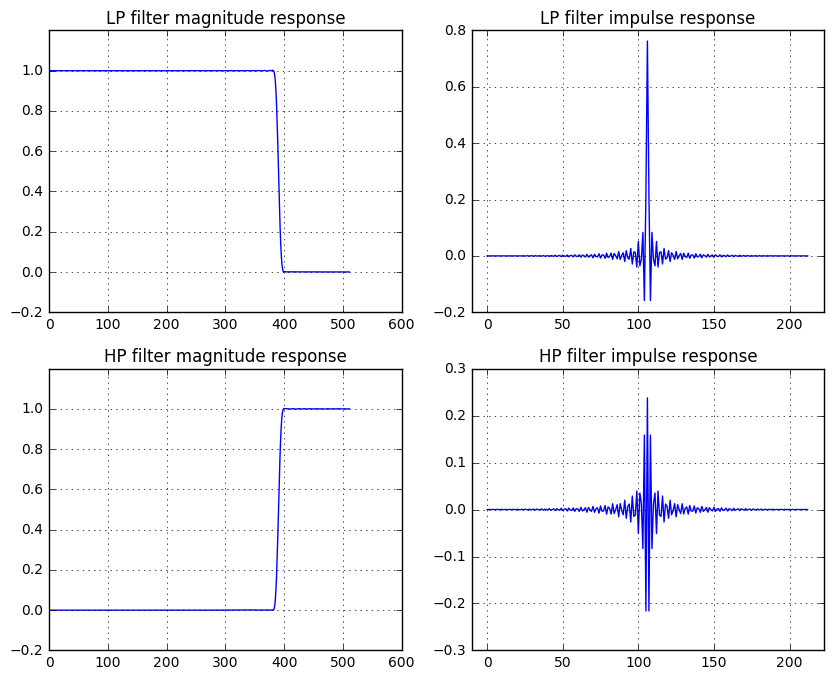

In [3]:
kernel_size = 213
cutoff = 2 * freqs[2] / fs

# firwin() LP
kernel_lp = sig.firwin(kernel_size, cutoff)

# compute HP kernel from LP kernel
kernel_hp = -kernel_lp
kernel_hp[kernel_size // 2] += 1

_, fr_lp = sig.freqz(kernel_lp)
_, fr_hp = sig.freqz(kernel_hp)


plt.subplots(2, 2, figsize=(10, 8))

plt.subplot(221)
plt.title('LP filter magnitude response')
plt.plot(np.abs(fr_lp))
plt.ylim([-0.2, 1.2])
plt.grid()

plt.subplot(222)
plt.title('LP filter impulse response')
plt.plot(kernel_lp)
plt.xlim([-10, kernel_size + 10])
plt.grid()

plt.subplot(223)
plt.title('HP filter magnitude response')
plt.plot(np.abs(fr_hp))
plt.ylim([-0.2, 1.2])
plt.grid()

plt.subplot(224)
plt.title('HP filter impulse response')
plt.plot(kernel_hp)
plt.xlim([-10, kernel_size + 10])
plt.grid()


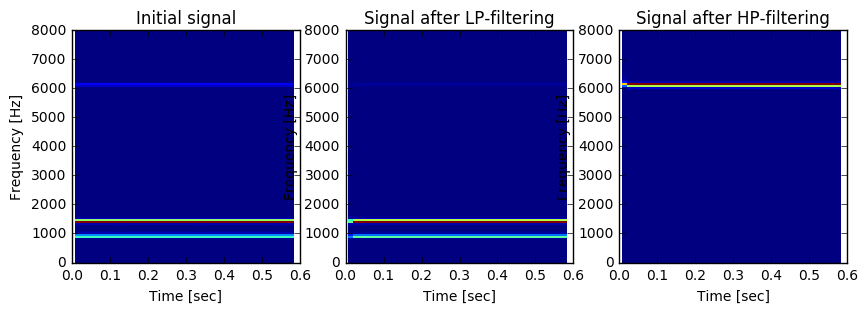

In [4]:
# filter signal with both LP and HP filters
filtered_lp = sig.lfilter(kernel_lp, [1], s)
filtered_hp = sig.lfilter(kernel_hp, [1], s)


plt.subplots(1, 3, figsize=(10, 3))

plt.subplot(131)
plt.title('Initial signal')
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(132)
plt.title('Signal after LP-filtering')
f, t, Sxx = sig.spectrogram(filtered_lp, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(133)
plt.title('Signal after HP-filtering')
f, t, Sxx = sig.spectrogram(filtered_hp, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
